In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
from pathlib import Path
import seaborn as sns
%matplotlib inline
import matplotlib as plt
from yahooquery import Ticker
from EfficientFrontierTool  import EfficientFrontier
import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")
import hvplot.pandas

C:\Users\gschr\Anaconda3\envs\pyvizenv\lib\site-packages\xarray\core\merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
#path equals etc... 

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [5]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2018-09-11", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-09-11", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["AAPL", "QQQ", "ARKK", "BA", "XLB", "XLC", "XLE", "XLF", "XLI", "XLK", "XLP", "XLRE", "XLU", "XLV", "XLY"]

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_portfolio.head()

AAPL                                        ARKK  \
                             open     high      low   close    volume    open   
time                                                                            
2018-09-11 00:00:00-04:00  218.01  224.299  216.560  223.86  27700011  46.570   
2018-09-12 00:00:00-04:00  224.94  225.000  219.840  221.06  39249350  47.410   
2018-09-13 00:00:00-04:00  223.52  228.350  222.570  226.40  31575373  47.990   
2018-09-14 00:00:00-04:00  225.75  226.840  222.522  223.64  23562371  48.050   
2018-09-17 00:00:00-04:00  222.15  222.950  217.270  217.89  28375627  48.095   

                                                             ...    XLV  \
                             high      low  close    volume  ...   open   
time                                                         ...          
2018-09-11 00:00:00-04:00  47.480  46.4000  47.46  181333.0  ...  92.15   
2018-09-12 00:00:00-04:00  47.659  46.7098  47.56  215033.0  ...  92.29   
2018-09-13 00:00:00-04:00  48.429  47.6886  47.93  266565.0  ...  93.09   
2018-09-14 00:00:00-04:00  48.600  47.8300  48.24  305215.0  ...  93.92   
2018-09-17 00:00:00-04:00  48.340  47.2500  47.28  296228.0  ...  93.53   

                                                              XLY          \
                            high     low  close    volume    open    high   
time                                                                        
2018-09-11 00:00:00-04:00  92.41  91.840  92.23   4720964  115.76  117.02   
2018-09-12 00:00:00-04:00  92.86  92.110  92.71  10303166  116.96  117.23   
2018-09-13 00:00:00-04:00  93.82  93.000  93.80   9145883  117.60  117.74   
2018-09-14 00:00:00-04:00  93.92  93.360  93.52   5379127  117.36  117.58   
2018-09-17 00:00:00-04:00  93.54  93.075  93.20   5217575  116.75  116.77   

                                                     
                               low   close   volume  
time                                                 
2018-09-11 00:00:00-04:00  115.555  116.94  3875446  
2018-09-12 00:00:00-04:00  116.180  117.17  4108258  
2018-09-13 00:00:00-04:00  117.110  117.29  3882439  
2018-09-14 00:00:00-04:00  116.440  116.93  2878489  
2018-09-17 00:00:00-04:00  115.370  115.47  4657052  

[5 rows x 80 columns]

In [6]:
#df_portfolio.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
port_data = pd.DataFrame()

for c in df_portfolio.columns:
    if c[1] in "close":
        port_data[c[0]] = df_portfolio[c[0]][c[1]]

In [7]:
#clean data & find the daily returns of each stock in the portfolio & ETFs
port_data.index= port_data.index.date

port_data_rt= port_data.pct_change()
port_data_rt= port_data_rt.dropna()

In [8]:
#sep data
etf_tickers= ["XLB", "XLC", "XLE", "XLF", "XLI", "XLK", "XLP", "XLRE", "XLU", "XLV", "XLY"]
etf_data= port_data_rt.loc[:,etf_tickers]
port_data_rt= port_data_rt.drop(columns= etf_tickers)
print(etf_data)


                 XLB       XLC       XLE       XLF       XLI       XLK  \
2018-09-12  0.000507 -0.003108  0.005036 -0.009003  0.003464 -0.003896   
2018-09-13  0.003885  0.006650  0.000271 -0.001425  0.005242  0.011195   
2018-09-14 -0.000337 -0.001239  0.005416  0.006778  0.005469 -0.000534   
2018-09-17  0.003366 -0.009301  0.001481 -0.003189  0.000379 -0.012412   
2018-09-18  0.001174  0.006050  0.006992  0.004088  0.009104  0.005946   
...              ...       ...       ...       ...       ...       ...   
2021-09-03 -0.006864  0.000117 -0.005726 -0.006005 -0.006176  0.003842   
2021-09-07 -0.006443  0.002105 -0.005965 -0.005385 -0.017784  0.000251   
2021-09-08 -0.009551 -0.005369 -0.012828 -0.003301  0.001947 -0.004014   
2021-09-09  0.000476 -0.004694  0.001886  0.002915 -0.004761 -0.004030   
2021-09-10 -0.000357 -0.006496 -0.000209 -0.006869 -0.004783 -0.009674   

                 XLP      XLRE       XLU       XLV       XLY  
2018-09-12  0.011315  0.001487 -0.001107  0.0052

In [9]:
#concat the portfolio into total returns

weights = [ 1.0/len(port_data_rt.columns) for s in range(0,len(port_data_rt.columns)) ]
weighted_return= (weights * port_data_rt)
portfolio_return = weighted_return.sum(axis=1)
portfolio_return.head()

2018-09-12    0.001795
2018-09-13    0.010293
2018-09-14   -0.000884
2018-09-17   -0.011989
2018-09-18    0.011761
dtype: float64

In [10]:
#combine the portfolio with etfs to prepare for correlation calc
port_corr= pd.concat([portfolio_return, etf_data], axis="columns", join="inner")
port_corr= port_corr.rename(columns={0: 'Portfolio'})
port_corr.head()

Portfolio       XLB       XLC       XLE       XLF       XLI  \
2018-09-12   0.001795  0.000507 -0.003108  0.005036 -0.009003  0.003464   
2018-09-13   0.010293  0.003885  0.006650  0.000271 -0.001425  0.005242   
2018-09-14  -0.000884 -0.000337 -0.001239  0.005416  0.006778  0.005469   
2018-09-17  -0.011989  0.003366 -0.009301  0.001481 -0.003189  0.000379   
2018-09-18   0.011761  0.001174  0.006050  0.006992  0.004088  0.009104   

                 XLK       XLP      XLRE       XLU       XLV       XLY  
2018-09-12 -0.003896  0.011315  0.001487 -0.001107  0.005204  0.001967  
2018-09-13  0.011195 -0.001273  0.005940  0.008124  0.011757  0.001024  
2018-09-14 -0.000534 -0.002368 -0.008562 -0.005128 -0.002985 -0.003069  
2018-09-17 -0.012412  0.003652  0.005360  0.002946 -0.003422 -0.012486  
2018-09-18  0.005946 -0.004548 -0.005628 -0.002019  0.005472  0.012817

In [11]:
#run correlation
correlation= port_corr.corr()
correlation

Portfolio       XLB       XLC       XLE       XLF       XLI  \
Portfolio   1.000000  0.768756  0.809753  0.636745  0.749652  0.815351   
XLB         0.768756  1.000000  0.708085  0.760300  0.873892  0.912616   
XLC         0.809753  0.708085  1.000000  0.571019  0.696983  0.723509   
XLE         0.636745  0.760300  0.571019  1.000000  0.815917  0.791561   
XLF         0.749652  0.873892  0.696983  0.815917  1.000000  0.913796   
XLI         0.815351  0.912616  0.723509  0.791561  0.913796  1.000000   
XLK         0.867394  0.750853  0.887156  0.562745  0.710923  0.762427   
XLP         0.677332  0.720493  0.683987  0.519916  0.706005  0.731757   
XLRE        0.722126  0.723094  0.654730  0.574416  0.736867  0.752656   
XLU         0.632857  0.642595  0.537875  0.456767  0.639116  0.650132   
XLV         0.753270  0.759003  0.758300  0.582150  0.729044  0.769581   
XLY         0.866922  0.815791  0.860707  0.646097  0.788787  0.842557   

                XLK       XLP      XLRE       XLU       XLV       XLY  
Portfolio  0.867394  0.677332  0.722126  0.632857  0.753270  0.866922  
XLB        0.750853  0.720493  0.723094  0.642595  0.759003  0.815791  
XLC        0.887156  0.683987  0.654730  0.537875  0.758300  0.860707  
XLE        0.562745  0.519916  0.574416  0.456767  0.582150  0.646097  
XLF        0.710923  0.706005  0.736867  0.639116  0.729044  0.788787  
XLI        0.762427  0.731757  0.752656  0.650132  0.769581  0.842557  
XLK        1.000000  0.707857  0.674429  0.566342  0.812932  0.886511  
XLP        0.707857  1.000000  0.785338  0.810223  0.797239  0.702781  
XLRE       0.674429  0.785338  1.000000  0.826414  0.739839  0.727666  
XLU        0.566342  0.810223  0.826414  1.000000  0.705349  0.593723  
XLV        0.812932  0.797239  0.739839  0.705349  1.000000  0.773329  
XLY        0.886511  0.702781  0.727666  0.593723  0.773329  1.000000

'\nIndustry=\n    XLB- Materials\n    XLC- Telecommunications \n    XLE- Energy\n    XLF- Financials\n    XLI- Industrials\n    XLK- Information Tech\n    XLP- Consumer Staples\n    XLRE- Real Estate\n    XLU- Utilities\n    XLV- Healthcare\n    XLY- Consumer Discretionary\n'

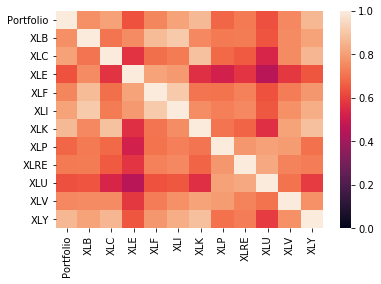

In [12]:
#correlation heatmap
sns.heatmap(correlation, vmin=0, vmax=1)
"""
Industry=
    XLB- Materials
    XLC- Telecommunications 
    XLE- Energy
    XLF- Financials
    XLI- Industrials
    XLK- Information Tech
    XLP- Consumer Staples
    XLRE- Real Estate
    XLU- Utilities
    XLV- Healthcare
    XLY- Consumer Discretionary
"""

In [13]:
#reference the least correlated ETF
less_corr = correlation.iloc[0]
selected_etf= less_corr.loc[less_corr==less_corr.min()].index[0]

In [14]:
#pulling ETF holdings
t = Ticker(selected_etf)
t.fund_holding_info

{'XLU': {'maxAge': 1,
  'stockPosition': 0.9983,
  'bondPosition': 0.0,
  'holdings': [{'symbol': 'NEE',
    'holdingName': 'NextEra Energy Inc',
    'holdingPercent': 0.161},
   {'symbol': 'DUK',
    'holdingName': 'Duke Energy Corp',
    'holdingPercent': 0.0851},
   {'symbol': 'SO', 'holdingName': 'Southern Co', 'holdingPercent': 0.0718},
   {'symbol': 'D',
    'holdingName': 'Dominion Energy Inc',
    'holdingPercent': 0.0665},
   {'symbol': 'EXC',
    'holdingName': 'Exelon Corp',
    'holdingPercent': 0.048499998},
   {'symbol': 'AEP',
    'holdingName': 'American Electric Power Co Inc',
    'holdingPercent': 0.047399998},
   {'symbol': 'SRE', 'holdingName': 'Sempra Energy', 'holdingPercent': 0.0468},
   {'symbol': 'XEL',
    'holdingName': 'Xcel Energy Inc',
    'holdingPercent': 0.0397},
   {'symbol': 'PEG',
    'holdingName': 'Public Service Enterprise Group Inc',
    'holdingPercent': 0.033800002},
   {'symbol': 'WEC',
    'holdingName': 'WEC Energy Group Inc',
    'holdingPe

In [15]:
etf_holdings= t.fund_holding_info[selected_etf]['holdings']
etf_holdings

[{'symbol': 'NEE',
  'holdingName': 'NextEra Energy Inc',
  'holdingPercent': 0.161},
 {'symbol': 'DUK',
  'holdingName': 'Duke Energy Corp',
  'holdingPercent': 0.0851},
 {'symbol': 'SO', 'holdingName': 'Southern Co', 'holdingPercent': 0.0718},
 {'symbol': 'D',
  'holdingName': 'Dominion Energy Inc',
  'holdingPercent': 0.0665},
 {'symbol': 'EXC',
  'holdingName': 'Exelon Corp',
  'holdingPercent': 0.048499998},
 {'symbol': 'AEP',
  'holdingName': 'American Electric Power Co Inc',
  'holdingPercent': 0.047399998},
 {'symbol': 'SRE', 'holdingName': 'Sempra Energy', 'holdingPercent': 0.0468},
 {'symbol': 'XEL', 'holdingName': 'Xcel Energy Inc', 'holdingPercent': 0.0397},
 {'symbol': 'PEG',
  'holdingName': 'Public Service Enterprise Group Inc',
  'holdingPercent': 0.033800002},
 {'symbol': 'WEC',
  'holdingName': 'WEC Energy Group Inc',
  'holdingPercent': 0.031400003}]

In [16]:
#pulling tickers from etf holdings (api)
symbols=[]
for i in range(len(etf_holdings)):
    symbols.append(etf_holdings[i]['symbol'])
print(symbols)

['NEE', 'DUK', 'SO', 'D', 'EXC', 'AEP', 'SRE', 'XEL', 'PEG', 'WEC']


In [17]:
#find returns of etf holdings
df_etf = api.get_barset(
    symbols,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df


etf_dataDF = pd.DataFrame()

for c in df_etf.columns:
    if c[1] in "close":
        etf_dataDF[c[0]] = df_etf[c[0]][c[1]]

In [18]:
#clean etf holdings data & daily returns
etf_dataDF.index= etf_dataDF.index.date

etf_dataDF= etf_dataDF.pct_change()
etf_dataDF= etf_dataDF.dropna()

In [19]:
#find the sharp ratio of the etf holdings without weights
sharpe_ratios = (etf_dataDF.mean() * 252) / (etf_dataDF.std() * np.sqrt(252))
sharpe_ratios

AEP    0.383197
D      0.233396
DUK    0.428511
EXC    0.285540
NEE    0.031675
PEG    0.337154
SO     0.602549
SRE    0.288865
WEC    0.518997
XEL    0.548908
dtype: float64

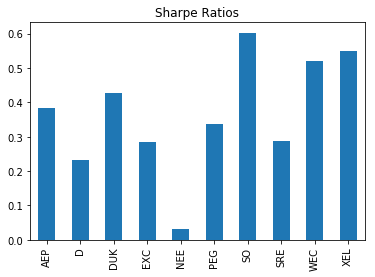

In [20]:
#sharp ratio plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [21]:
#pick out the best stock to add to our portfolio based off of max sharpe ratio from the etf holdings
perfect_stock= sharpe_ratios.loc[sharpe_ratios==sharpe_ratios.max()].index[0]
perfect_stock

'SO'

In [22]:
#get the closing price from our portfolio holdings
port_data
etf_tickers= ["XLB", "XLC", "XLE", "XLF", "XLI", "XLK", "XLP", "XLRE", "XLU", "XLV", "XLY"]
etf_data= port_data.loc[:,etf_tickers]
port_data= port_data.drop(columns= etf_tickers)


In [23]:
#pull api data of perfect stock
picked_stockDF = api.get_barset(
    perfect_stock,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

df_picked = pd.DataFrame()

for c in picked_stockDF.columns:
    if c[1] in "close":
        df_picked[c[0]] = picked_stockDF[c[0]][c[1]]
        
df_picked.index= df_picked.index.date

In [24]:
#append perfect stock to our portfolio
port_data= pd.concat([port_data, df_picked], axis= 'columns', join='inner') 

In [25]:
new_port_dataRT= port_data.pct_change()

new_port_dataRT=new_port_dataRT.dropna()
new_port_dataRT

AAPL      ARKK        BA       QQQ        SO        SO
2018-09-12 -0.012508  0.002107  0.023573 -0.002840 -0.001358 -0.001358
2018-09-13  0.024156  0.007780  0.005545  0.010132  0.003853  0.003853
2018-09-14 -0.012191  0.006468  0.012549 -0.002440 -0.008806 -0.008806
2018-09-17 -0.025711 -0.019900 -0.010865 -0.014403  0.010934  0.010934
2018-09-18  0.001606  0.018190  0.021379  0.008165  0.009464  0.009464
...              ...       ...       ...       ...       ...       ...
2021-09-03  0.003903  0.001362 -0.012091  0.003076 -0.008823 -0.008823
2021-09-07  0.015488 -0.002560 -0.018014  0.001363 -0.001358 -0.001358
2021-09-08 -0.010083 -0.027747 -0.013350 -0.003350  0.016921  0.016921
2021-09-09 -0.006576  0.004371  0.012395 -0.003702 -0.001931 -0.001931
2021-09-10 -0.033095 -0.010758 -0.017337 -0.007696 -0.014364 -0.014364

[753 rows x 6 columns]

In [26]:
ef = EfficientFrontier(port_data, seed=30, num_portfolios=10000, minWeight=0.001, maxWeight=.4)

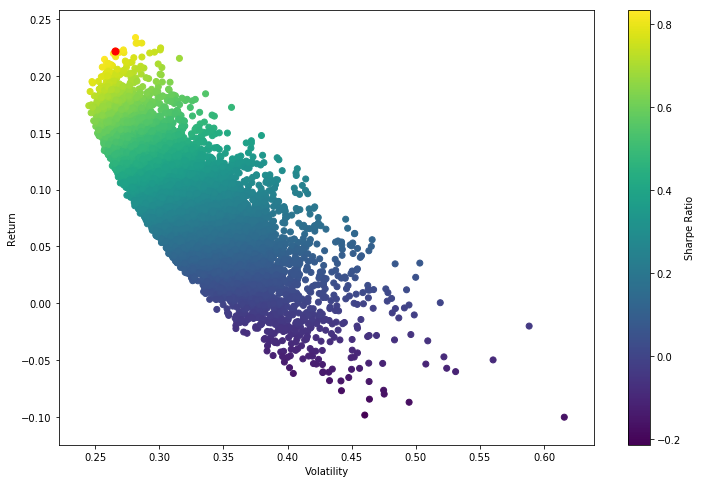

In [27]:
ef.plot_frontier()

In [28]:
#Find the best weights suited for your portfolio's holdings
new_portfolio_weights = ef.best()
new_portfolio_weights

AAPL    0.001000
ARKK    0.348133
BA      0.001000
QQQ     0.400000
SO      0.248867
SO      0.001000
dtype: float64

In [29]:
#distributed weights to portfolio holdings
weighted_returns= (new_portfolio_weights * new_port_dataRT)
new_portfolio_return = weighted_returns.sum(axis=1)
new_portfolio_return.head()

2018-09-12   -0.000731
2018-09-13    0.007754
2018-09-14   -0.000924
2018-09-17   -0.009994
2018-09-18    0.011986
dtype: float64

In [30]:
#combine new portfolio assests total returns of portfolio
new_cumprod_port= (1 + new_portfolio_return).cumprod()
new_cumprod_port.head()

2018-09-12    0.999269
2018-09-13    1.007017
2018-09-14    1.006087
2018-09-17    0.996032
2018-09-18    1.007971
dtype: float64

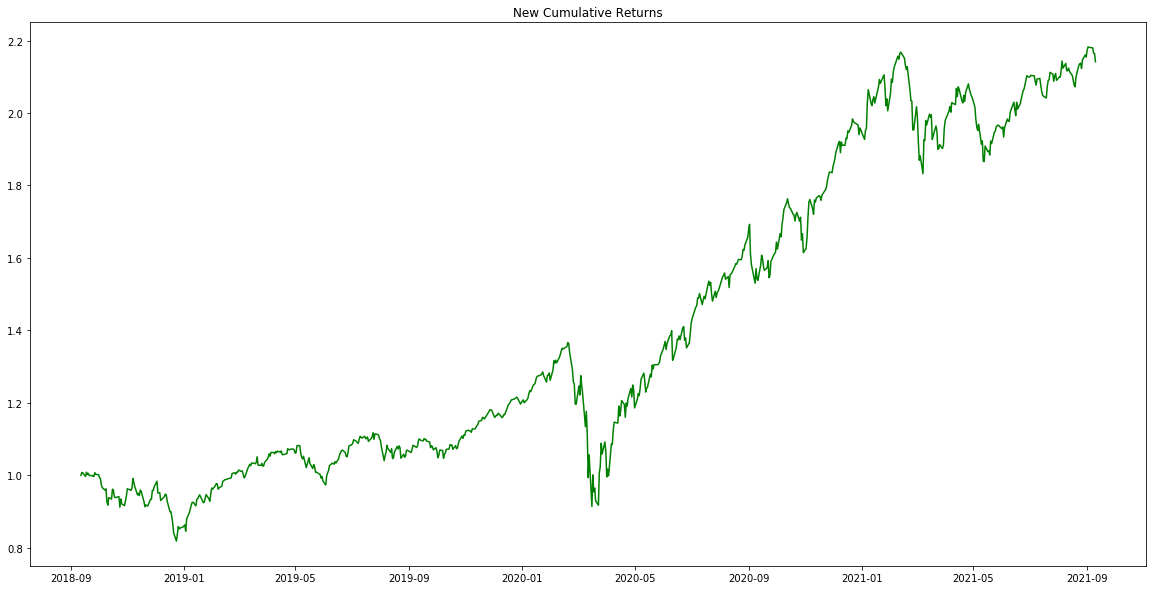

In [31]:
#plot NEW portfolio returns
new_cumprod_port.plot(figsize=(20, 10), title="New Cumulative Returns", color= 'green')

In [32]:
###going to use at the end to compare starting returns vs adusted portfolio returns

#cumulative portfolio returns
old_cumprod_port= (1 + portfolio_return).cumprod()
old_cumprod_port.head()

2018-09-12    1.001795
2018-09-13    1.012107
2018-09-14    1.011212
2018-09-17    0.999088
2018-09-18    1.010839
dtype: float64

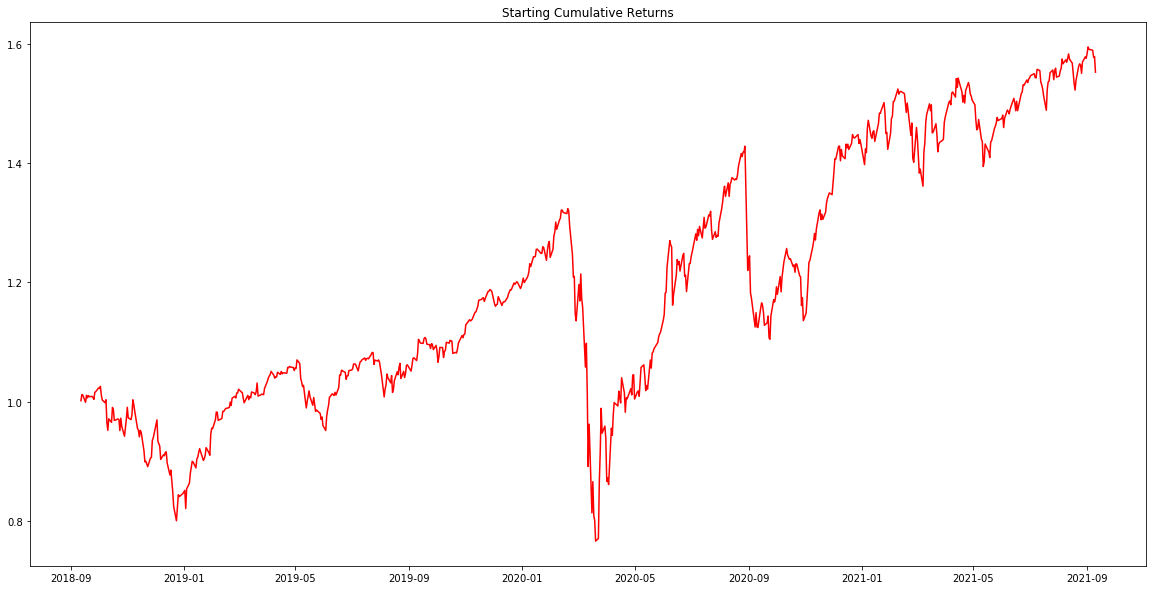

In [33]:
#plot OLD portfolio returns
old_cumprod_port.plot(figsize=(20, 10), title="Starting Cumulative Returns", color= 'red')

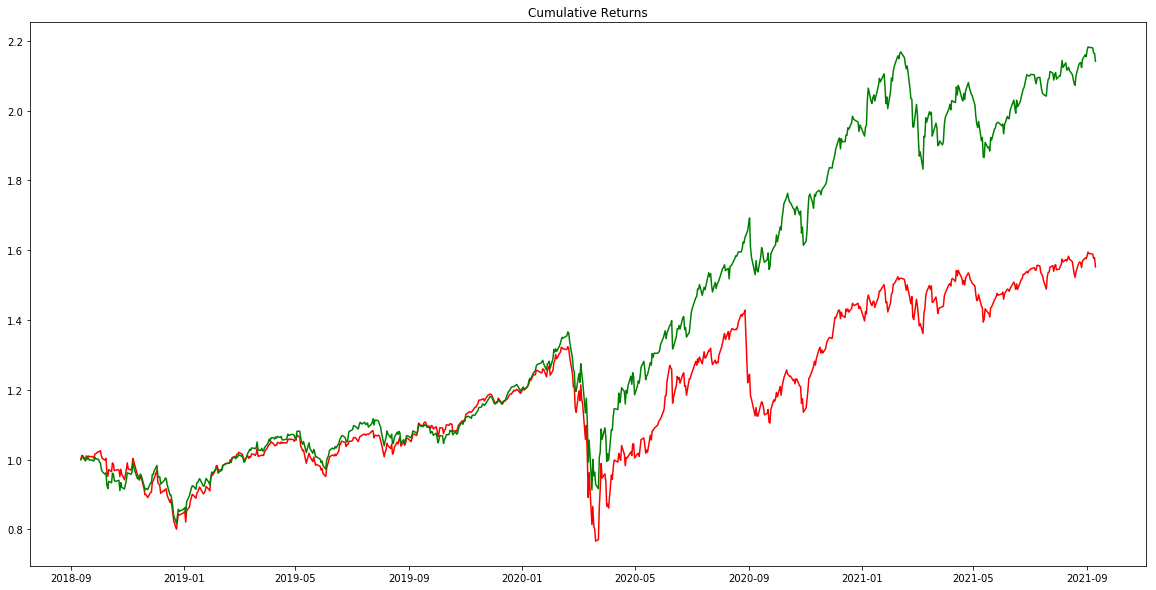

In [34]:
#plot comparing old returns to new adjusted returns
ax = old_cumprod_port.plot(figsize=(20, 10), title="Cumulative Returns", color= 'red')
new_cumprod_port.plot(ax=ax, figsize=(20, 10), title="Cumulative Returns", color= 'green')

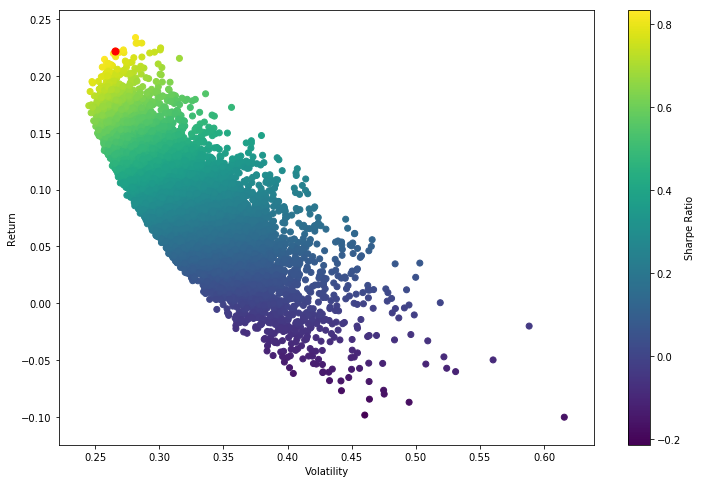

In [35]:
#Set all data visualizations as objects to put on a pannel 
dviz_startrt = old_cumprod_port.hvplot.line(figsize=(20, 10), title="Starting Cumulative Returns", color= 'red')
#dviz_hmap = sns.heatmap(correlation, vmin=0, vmax=1)
dviz_sharp = sharpe_ratios.hvplot.bar( title="Sharpe Ratios")
dviz_weights = ef.plot_frontier()
dviz_finalrt= new_cumprod_port.hvplot.line(figsize=(20, 10), title="New Cumulative Returns", color= 'green') 
dviz_comprt= new_cumprod_port.hvplot.line(figsize=(20, 10), title="Cumulative Returns", color= 'green') * old_cumprod_port.hvplot.line(figsize=(20, 10), title="Cumulative Returns", color= 'red')
jhj=correlation.hvplot.heatmap(vmin=0)

In [36]:
# create pannel 
port_opt_pan= pn.Row(dviz_startrt,jhj,  dviz_sharp,  ef.plothv(), dviz_finalrt, dviz_comprt   )
tab=  pn.Tabs(port_opt_pan)

In [37]:
tab

Tabs
    [0] Row
        [0] HoloViews(Curve)
        [1] HoloViews(HeatMap)
        [2] HoloViews(Bars)
        [3] HoloViews(Scatter)
        [4] HoloViews(Curve)
        [5] HoloViews(Overlay)